In [1]:
import IP
from IP import imread, imresize, randn, dtfuv, fftfilt, np, imshow, rgb2gray, plt, fft2, ifft2, fftshift
import scipy
from scipy.signal import convolve2d

In [2]:
# general function for adding blur and noise to our default image

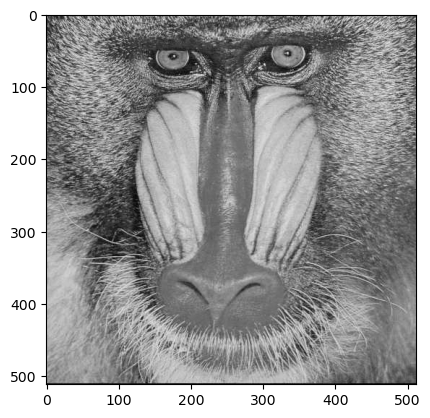

In [3]:
I = rgb2gray(imread("baboon.jpg"))
plt.figure()
imshow(I, aspect="equal", cmap="gray")

In [36]:
# Gaussian lowpass filter
def fftfiltGLPF(I, D0):
    U,V=dtfuv(I.shape[0],I.shape[1])
    D = IP.np.sqrt(U**2+V**2)
    filter=IP.np.exp(-D**2/(2*(D0**2)))
    return fftfilt(I,filter)

In [37]:
# Gaussian lowpass filter
def GLPF(I, D0):
    U,V=dtfuv(I.shape[0],I.shape[1])
    D = IP.np.sqrt(U**2+V**2)
    filter=IP.np.exp(-D**2/(2*(D0**2)))
    If = fft2(I)
    filterf = fft2(filter)
    Ic = If * filterf
    return ifft2(Ic)

In [38]:
# Uniform noise filter
def uniform_noise(I, alpha=10):
    noise = randn(I.shape[0], I.shape[1])
    return noise*(I.mean()*(alpha/100))+I

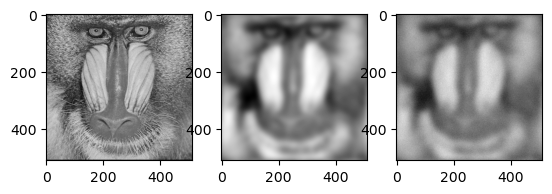

In [45]:
# Generate "broken" image
Ia = GLPF(I, 10)
Iz = fftfiltGLPF(I, 40)
Ib = uniform_noise(Ia, 5)
IP.subplot(1,3,1);imshow(I, aspect="equal", cmap="gray")
IP.subplot(1,3,2);imshow(np.abs(Ia), aspect="equal", cmap="gray")
IP.subplot(1,3,3);imshow(np.abs(Ib), aspect="equal", cmap="gray")

In [46]:
# Deblurring given known gaussian blur size 40

In [47]:
# "inverse" Gaussian lowpass filter
def iGLPF(I, D0):
    U,V=dtfuv(I.shape[0],I.shape[1])
    D = IP.np.sqrt(U**2+V**2)
    filter=IP.np.exp(-D**2/(2*(D0**2)))
#     padded = 2*I.shape[0]
#     filterpad = np.zeros([padded, padded],dtype = "complex_")
#     filterpad[:filter.shape[0],:filter.shape[1]] = filter
#     Ipad = np.zeros([padded, padded],dtype = "complex_")
#     Ipad[:I.shape[0],:I.shape[1]] = I
    If = fft2(I)
    filterf = fft2(filter)
    epsilon = 1e-10
    deblurred = If / (filterf+epsilon)
    return ifft2(deblurred)

#     If = fftfilt(I, filter)
#     If = If-If.min()
#     If =(If/If.max())*256
#     return If

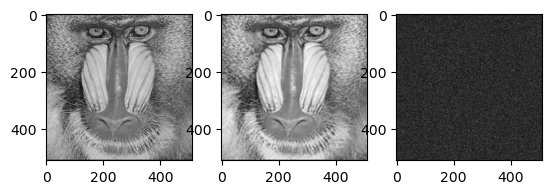

In [48]:
deblur_a = iGLPF(Ia, 10) # only blur
deblur_b = iGLPF(Ib, 10) # blur and random uniform noise
IP.subplot(1,3,1);imshow(np.abs(I), aspect="equal", cmap="gray")
IP.subplot(1,3,2);imshow(np.abs(deblur_a), aspect="equal", cmap="gray")
IP.subplot(1,3,3);imshow(np.abs(deblur_b), aspect="equal", cmap="gray")

In [154]:
deblur_a.min()

6452.450217146631